# Feature Engineering & EDA

With the data centralized, I can take a closer look to see how my features will interact with my target variable, IMDB ratings. This will be a regression problem, so I will be using Linear Regression (including Ridge and Lasso), Random Forest Regression, and Gradient Boost as my models to try and predict with, so I will have to prepare my data accordingly. I plan on categorizing and dummying the features that aren't numerical, as well as categorize numerical data that shouldn't have a greater or worse weight based on the value (i.e. time or dates).

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import word_tokenize  
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment import vader, SentimentAnalyzer

import datetime, time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import json

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
with open('./Assets_&_Data/series_df_full.pickle', 'rb') as handle:
    series_df = pickle.load(handle)

In [3]:
series_df.columns

Index(['airsDayOfWeek', 'airsTime', 'network', 'overview_x', 'rating',
       'runtime_x', 'number_of_episodes', 'number_of_seasons', 'overview_y',
       'status_y', 'type_x', 'actors', 'awards', 'genre_y', 'imdb_id',
       'imdb_rating', 'imdb_votes', 'plot', 'released', 'writer'],
      dtype='object')

In [4]:
clean_time = series_df[['airsTime']]

In [5]:
pm_slot = clean_time[clean_time['airsTime'].str.contains('PM')]

pm_slot_ = clean_time[clean_time['airsTime'].str.contains('pm')]

am_slot = clean_time[clean_time['airsTime'].str.contains('AM')]

am_slot_ = clean_time[clean_time['airsTime'].str.contains('am')]

In [6]:
missing_time = clean_time[clean_time['airsTime'] == '']

In [7]:
remaining_time = clean_time[clean_time['airsTime'] != '']

remaining_time = remaining_time[~remaining_time['airsTime'].str.contains('PM')]

remaining_time = remaining_time[~remaining_time['airsTime'].str.contains('pm')]

remaining_time = remaining_time[~remaining_time['airsTime'].str.contains('AM')]

remaining_time = remaining_time[~remaining_time['airsTime'].str.contains('am')]

In [8]:
for i in reversed(range(1, 25)):
    if i >= 22:
        remaining_time[remaining_time['airsTime'].str.contains(str(i))] = 'latenight'
    elif i >= 18:
        remaining_time[remaining_time['airsTime'].str.contains(str(i))] = 'evening'
    elif i >= 12:
        remaining_time[remaining_time['airsTime'].str.contains(str(i))] = 'afternoon'
    elif i >=5:
        remaining_time[remaining_time['airsTime'].str.contains(str(i))] = 'morning'
    else: 
        remaining_time[remaining_time['airsTime'].str.contains(str(i))] = 'latenight'

In [9]:
remaining_time

,airsTime
Veep,latenight
Crashing,latenight
Animals.,latenight
Wyatt Cenac's Problem Areas,latenight
HBO,morning
Tales from the Crypt,latenight
Crashbox,afternoon
Any Given Wednesday with Bill Simmons,latenight
Vinyl,evening
Elizabeth I,evening


In [10]:
# Categorizing PM slots
for i in range(1, 13):
    if i < 6:
        pm_slot[pm_slot['airsTime'].str.contains(str(i))] = 'afternoon'
        pm_slot_[pm_slot_['airsTime'].str.contains(str(i))] = 'afternoon'
    elif i >= 6 & i < 10:
        pm_slot[pm_slot['airsTime'].str.contains(str(i))] = 'evening'
        pm_slot_[pm_slot_['airsTime'].str.contains(str(i))] = 'evening'
    else: 
        pm_slot[pm_slot['airsTime'].str.contains(str(i))] = 'latenight'
        pm_slot_[pm_slot_['airsTime'].str.contains(str(i))] = 'latenight'

#pm_slot[pm_slot['airsTime'].str.contains('8', '9')]

In [11]:
# Categorizing PM slots
for i in range(1, 13):
    if i < 5:
        am_slot[am_slot['airsTime'].str.contains(str(i))] = 'latenight'
        am_slot_[am_slot_['airsTime'].str.contains(str(i))] = 'latenight'
    else: 
        am_slot[am_slot['airsTime'].str.contains(str(i))] = 'morning'
        am_slot_[am_slot_['airsTime'].str.contains(str(i))] = 'morning'

#pm_slot[pm_slot['airsTime'].str.contains('8', '9')]

In [12]:
missing_time['airsTime'] = 'unknown'

In [13]:
timeslot = pd.concat((am_slot, am_slot_, pm_slot, pm_slot_, remaining_time, missing_time))

In [14]:
plot_df = pd.merge(series_df, timeslot, left_index=True, right_index=True)

In [15]:
series_df['released'] = pd.to_datetime(series_df['released'])

In [16]:
week_day = series_df[['released']]

In [17]:
week_day['weekday'] = week_day['released'].dt.dayofweek

In [18]:
week_day['month'] = week_day['released'].dt.month

In [19]:
plot_df['month'] = week_day['month']
plot_df['weekday'] = week_day['weekday']

# Categorizing runtime

I will be categorizing this data as well. Although the runtimes that I've gathered have a lot of different values, in reality/practice, tv shows are usually in 30 minute and 1 hour increments (longer than 1 hour would generally be specials or movies). For this reason, I chose relatively arbitrary runtimes to group group the shows by.

In [20]:
series_df = series_df[(series_df[['runtime_x']] != ('')).all(axis=1)]

In [21]:
series_df[['runtime_x']] = series_df[['runtime_x']].astype(int)

In [22]:
series_df['runtime_x'].value_counts()

30     692
60     425
45     315
25     241
15      35
20      33
50      24
11      23
55      16
10      16
120     13
40      13
85      10
1        9
90       8
12       8
35       4
13       4
65       3
70       3
180      2
80       2
7        2
75       1
95       1
125      1
140      1
6        1
3        1
240      1
Name: runtime_x, dtype: int64

In [23]:
series_df['runtime_x'].head(10)

Game of Thrones         55
Westworld               60
Big Little Lies         50
The Deuce               60
Succession              60
Curb Your Enthusiasm    30
Veep                    30
Silicon Valley          30
Ballers                 30
High Maintenance        10
Name: runtime_x, dtype: int64

In [24]:
series_df['runtime_cat'] = np.where(series_df['runtime_x'] < 30, 'half', 'full')

In [25]:
series_df['runtime_cat'].loc[series_df.runtime_x < 30] = 'half'
series_df['runtime_cat'].loc[series_df.runtime_x > 70] = 'special'

In [26]:
series_df['runtime_cat'].value_counts()

full       1495
half        373
special      40
Name: runtime_cat, dtype: int64

In [27]:
series_df['runtime_cat'].head(10)

Game of Thrones         full
Westworld               full
Big Little Lies         full
The Deuce               full
Succession              full
Curb Your Enthusiasm    full
Veep                    full
Silicon Valley          full
Ballers                 full
High Maintenance        half
Name: runtime_cat, dtype: object

In [28]:
series_df.head(3)

,airsDayOfWeek,airsTime,network,overview_x,rating,runtime_x,number_of_episodes,number_of_seasons,overview_y,status_y,...,actors,awards,genre_y,imdb_id,imdb_rating,imdb_votes,plot,released,writer,runtime_cat
Game of Thrones,Sunday,9:00 PM,HBO,Seven noble families fight for control of the ...,TV-MA,55,73.0,8,Seven noble families fight for control of the ...,Returning Series,...,"Peter Dinklage, Lena Headey, Emilia Clarke, Ki...",1,"Action, Adventure, Drama, Fantasy, Romance",tt0944947,9.5,"1,361,235","In the mythical continent of Westeros, several...",2011-04-17,"David Benioff, D.B. Weiss",full
Westworld,Sunday,9:00 PM,HBO,Westworld is a dark odyssey about the dawn of ...,TV-MA,60,20.0,2,A dark odyssey about the dawn of artificial co...,Returning Series,...,"Evan Rachel Wood, Thandie Newton, Jeffrey Wrig...",1,"Drama, Mystery, Sci-Fi",tt0475784,8.9,"307,642",Westworld isn't your typical amusement park. I...,2016-10-02,0,full
Big Little Lies,Sunday,9:00 PM,HBO,"Subversive, darkly comedic drama Big Little Li...",TV-MA,50,7.0,2,"Subversive, darkly comedic drama Big Little Li...",Returning Series,...,"Reese Witherspoon, Nicole Kidman, Shailene Woo...",1,"Crime, Drama, Mystery",tt3920596,8.6,"86,060",While Madeline and Celeste take new in town si...,2017-02-19,David E. Kelley,full


# Separate genre_y values into additional columns

In [29]:
df = pd.Series(series_df['genre_y'].str.split(','))

In [30]:
genre_dummies = pd.get_dummies(df.apply(pd.Series).stack()).sum(level=0)

# Dummies

In [31]:
status_dummies = pd.get_dummies(series_df['status_y'], prefix='status')

In [32]:
type_dummies = pd.get_dummies(series_df['type_x'], prefix='type')

In [33]:
timeslot_dum = pd.get_dummies(timeslot, prefix='timeslot')

In [34]:
week_day_ = week_day.drop('released', axis=1)
week_day_dum1 = pd.get_dummies(week_day_['weekday'], prefix='day')
week_day_dum2 = pd.get_dummies(week_day_['month'], prefix='month')

# Combining all the dataframes

### To drop:
- airsDayOfWeek
- airsTime
- network
- overview_x
- runtime_x
- overview_y
- actors (dummy)
- genre_y (dummy)
- imdb_id
- imdb_rating
- plot
- released
- writer (dummy)

In [35]:
series_df.head(1)

,airsDayOfWeek,airsTime,network,overview_x,rating,runtime_x,number_of_episodes,number_of_seasons,overview_y,status_y,...,actors,awards,genre_y,imdb_id,imdb_rating,imdb_votes,plot,released,writer,runtime_cat
Game of Thrones,Sunday,9:00 PM,HBO,Seven noble families fight for control of the ...,TV-MA,55,73.0,8,Seven noble families fight for control of the ...,Returning Series,...,"Peter Dinklage, Lena Headey, Emilia Clarke, Ki...",1,"Action, Adventure, Drama, Fantasy, Romance",tt0944947,9.5,"1,361,235","In the mythical continent of Westeros, several...",2011-04-17,"David Benioff, D.B. Weiss",full


In [36]:
timeslot_dum.head(1)

,timeslot_00:00,timeslot_afternoon,timeslot_evening,timeslot_latenight,timeslot_morning,timeslot_unknown
Random Acts of Flyness,0,0,0,1,0,0


In [37]:
week_day_dum1.head(1)

,day_0,day_1,day_2,day_3,day_4,day_5,day_6
Game of Thrones,0,0,0,0,0,0,1


In [38]:
week_day_dum2.head(1)

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
Game of Thrones,0,0,0,1,0,0,0,0,0,0,0,0


In [39]:
series_df['runtime_cat'].head(1)

Game of Thrones    full
Name: runtime_cat, dtype: object

In [40]:
genre_dummies.head(1)

,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,Game-Show,History,...,Horror,Music,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Western
Game of Thrones,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
series_df = series_df.merge(timeslot_dum, left_index=True, right_index=True)

In [42]:
series_df = series_df.merge(week_day_dum1, left_index=True, right_index=True)
series_df = series_df.merge(week_day_dum2, left_index=True, right_index=True)
series_df = series_df.merge(genre_dummies, left_index=True, right_index=True)

In [43]:
model_df = series_df.drop(['network', 
                           'imdb_id', 
#                           'released', 
#                           'airsDayOfWeek', 
#                           'airsTime', 
#                           'overview_x', 
                           'overview_y', 
                           'plot', 
                           'genre_y', 
                           'status_y', 
                           'type_x', 
                           'runtime_x', 
                           'runtime_cat'], 
                          axis=1)

In [44]:
model_df.drop(['actors', 'writer'], axis=1, inplace=True)

In [45]:
series_df['imdb_votes'] = series_df['imdb_votes'].str.replace(',', '').astype(float)

In [46]:
model_df[['awards']] = model_df[['awards']].astype(float)

In [47]:
model_df[['imdb_rating']] = model_df[['imdb_rating']].astype(float)

In [48]:
model_df.drop('rating', axis=1, inplace=True)

# Final cleanup steps

Now that the data is useable in the proper format, I can see how the chosen features predicts on IMDB rating without additional feature engineering so far.

In [49]:
type(model_df['imdb_votes'][0])

str

In [50]:
model_df['imdb_votes'] = model_df['imdb_votes'].str.replace(',', '').astype(float)

In [51]:
series_df[['runtime_x', 'awards']] = series_df[['runtime_x', 'awards']].astype(float)

In [52]:
series_df.isnull().sum()

airsDayOfWeek          0
airsTime               0
network                0
overview_x            79
rating                 0
runtime_x              0
number_of_episodes     1
number_of_seasons      0
overview_y             0
status_y               0
type_x                 0
actors                 0
awards                 0
genre_y                0
imdb_id                0
imdb_rating            0
imdb_votes             0
plot                   0
released               0
writer                 0
runtime_cat            0
timeslot_00:00         0
timeslot_afternoon     0
timeslot_evening       0
timeslot_latenight     0
timeslot_morning       0
timeslot_unknown       0
day_0                  0
day_1                  0
day_2                  0
                      ..
 Romance               0
 Sci-Fi                0
 Short                 0
 Sport                 0
 Talk-Show             0
 Thriller              0
 War                   0
 Western               0
Action                 0


In [53]:
series_df['runtime_x'].value_counts()

30.0     685
60.0     416
45.0     315
25.0     241
15.0      35
20.0      32
50.0      24
11.0      23
55.0      16
10.0      16
40.0      13
120.0     13
85.0      10
1.0        9
12.0       8
90.0       8
35.0       4
13.0       4
70.0       3
65.0       2
180.0      2
7.0        2
80.0       2
140.0      1
240.0      1
3.0        1
6.0        1
95.0       1
125.0      1
75.0       1
Name: runtime_x, dtype: int64

In [54]:
model_df.dropna(inplace=True)

In [55]:
model_df.head()

,airsDayOfWeek,airsTime,overview_x,number_of_episodes,number_of_seasons,awards,imdb_rating,imdb_votes,released,timeslot_00:00,...,Horror,Music,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Western
Game of Thrones,Sunday,9:00 PM,Seven noble families fight for control of the ...,73.0,8,1.0,9.5,1361235.0,2011-04-17,0,...,0,0,0,0,0,0,0,0,0,0
Westworld,Sunday,9:00 PM,Westworld is a dark odyssey about the dawn of ...,20.0,2,1.0,8.9,307642.0,2016-10-02,0,...,0,0,0,0,0,0,0,0,0,0
Big Little Lies,Sunday,9:00 PM,"Subversive, darkly comedic drama Big Little Li...",7.0,2,1.0,8.6,86060.0,2017-02-19,0,...,0,0,0,0,0,0,0,0,0,0
The Deuce,Sunday,9:00 PM,This drama series follows the legalization and...,16.0,2,1.0,8.1,14113.0,2017-08-25,0,...,0,0,0,0,0,0,0,0,0,0
Succession,Sunday,10:00 PM,A drama about a dysfunctional media family dyn...,10.0,1,0.0,7.6,3927.0,2018-06-03,0,...,0,0,0,0,0,0,0,0,0,0


# Plotting

In [56]:
plot_df.columns

Index(['airsDayOfWeek', 'airsTime_x', 'network', 'overview_x', 'rating',
       'runtime_x', 'number_of_episodes', 'number_of_seasons', 'overview_y',
       'status_y', 'type_x', 'actors', 'awards', 'genre_y', 'imdb_id',
       'imdb_rating', 'imdb_votes', 'plot', 'released', 'writer', 'airsTime_y',
       'month', 'weekday'],
      dtype='object')

<BarContainer object of 1810 artists>

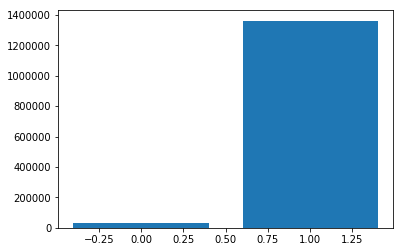

In [57]:
plt.bar(model_df['awards'], model_df['imdb_votes'])

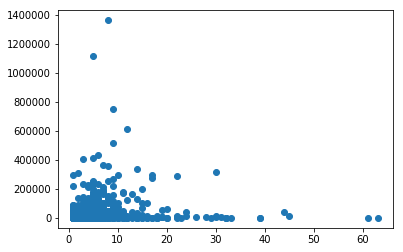

In [58]:
plt.scatter(model_df['number_of_seasons'], model_df['imdb_votes'])

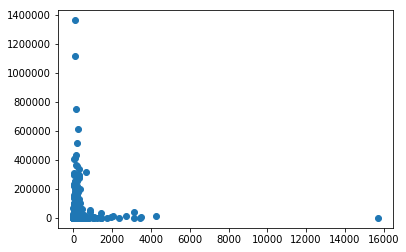

In [59]:
plt.scatter(model_df['number_of_episodes'], model_df['imdb_votes'])

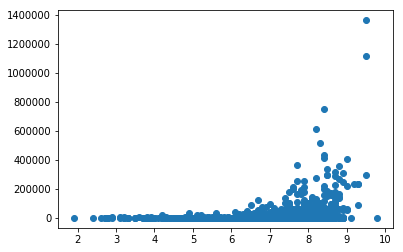

In [60]:
plt.scatter(model_df['imdb_rating'], model_df['imdb_votes'])

Text(0.5,1,'Distribution of IMDB Ratings')

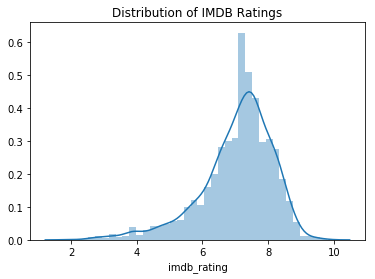

In [61]:
sns.distplot(model_df['imdb_rating']).set_title('Distribution of IMDB Ratings')

In [62]:
model_df.columns

Index(['airsDayOfWeek', 'airsTime', 'overview_x', 'number_of_episodes',
       'number_of_seasons', 'awards', 'imdb_rating', 'imdb_votes', 'released',
       'timeslot_00:00', 'timeslot_afternoon', 'timeslot_evening',
       'timeslot_latenight', 'timeslot_morning', 'timeslot_unknown', 'day_0',
       'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', ' Action',
       ' Adventure', ' Animation', ' Comedy', ' Crime', ' Drama', ' Family',
       ' Fantasy', ' Game-Show', ' History', ' Horror', ' Music', ' Musical',
       ' Mystery', ' News', ' Reality-TV', ' Romance', ' Sci-Fi', ' Short',
       ' Sport', ' Talk-Show', ' Thriller', ' War', ' Western', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Game-Show', 'History', 'Horror', 'Music',
       'Mystery', 

In [63]:
model_df.corr()

,number_of_episodes,number_of_seasons,awards,imdb_rating,imdb_votes,timeslot_00:00,timeslot_afternoon,timeslot_evening,timeslot_latenight,timeslot_morning,...,Horror,Music,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Western
number_of_episodes,1.000000,0.596127,0.108906,-0.041578,0.023587,-0.007607,0.013997,-0.028513,0.014867,0.133404,...,-0.011195,0.000300,-0.006286,0.304652,-0.021667,-0.003664,-0.003779,-0.009114,0.074843,-0.006269
number_of_seasons,0.596127,1.000000,0.267985,0.045578,0.175112,-0.020950,0.007490,0.036877,0.008857,0.073892,...,-0.031183,0.019151,-0.009457,0.274688,-0.030718,-0.010065,0.012725,-0.017452,0.024462,-0.000824
awards,0.108906,0.267985,1.000000,0.224792,0.197164,0.006836,0.040137,0.122356,-0.080712,-0.056592,...,0.008311,0.029176,-0.020720,0.024082,-0.141855,0.028072,-0.041543,-0.068328,0.008311,-0.007854
imdb_rating,-0.041578,0.045578,0.224792,1.000000,0.254105,-0.006957,0.027690,0.010081,-0.029016,-0.059660,...,0.019058,-0.027144,-0.009401,-0.083797,-0.239161,0.002801,-0.018236,-0.015901,-0.109511,0.052788
imdb_votes,0.023587,0.175112,0.197164,0.254105,1.000000,-0.009859,-0.015063,0.170792,-0.043685,-0.042325,...,-0.015763,-0.013784,-0.009629,-0.024346,-0.051700,-0.008078,-0.015593,-0.014262,-0.018532,-0.020190
timeslot_00:00,-0.007607,-0.020950,0.006836,-0.006957,-0.009859,1.000000,-0.022259,-0.025695,-0.011752,-0.007545,...,-0.003186,-0.002350,-0.001660,-0.003967,-0.008530,-0.001355,-0.003329,-0.002350,-0.003186,-0.003466
timeslot_afternoon,0.013997,0.007490,0.040137,0.027690,-0.015063,-0.022259,1.000000,-0.344496,-0.157556,-0.101151,...,0.007972,-0.031505,0.010023,0.001264,-0.016155,-0.018169,-0.012266,-0.031505,0.075557,-0.030913
timeslot_evening,-0.028513,0.036877,0.122356,0.010081,0.170792,-0.025695,-0.344496,1.000000,-0.181881,-0.116768,...,-0.002046,0.027541,0.034510,-0.048710,0.124400,0.052741,-0.006252,0.006238,-0.017801,-0.010135
timeslot_latenight,0.014867,0.008857,-0.080712,-0.029016,-0.043685,-0.011752,-0.157556,-0.181881,1.000000,-0.053404,...,0.004145,-0.016633,-0.011752,0.057962,-0.018999,-0.009593,0.002006,0.055564,0.004145,-0.024531
timeslot_morning,0.133404,0.073892,-0.056592,-0.059660,-0.042325,-0.007545,-0.101151,-0.116768,-0.053404,1.000000,...,-0.014479,-0.010679,-0.007545,0.141940,-0.007991,-0.006158,-0.015127,-0.010679,-0.014479,-0.015749


# Next Steps

Now that I know how badly my model is performing, I'd like to take a second look at my features to see if they can be modified to be better predictors.